In [2]:
import pandas as pd

# Load "raw_analyst_ratings.csv" dataset
df = pd.read_csv("raw_analyst_ratings.csv")

# Add headline length column
df['headline_length'] = df['headline'].str.len()

# Get basic stats
print(df['headline_length'].describe())


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


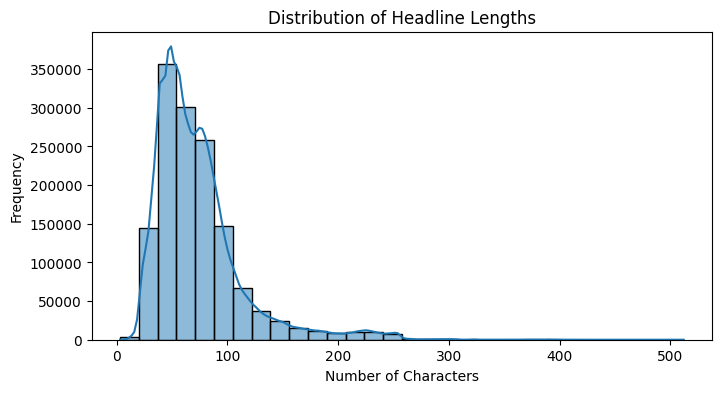

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.histplot(df['headline_length'], bins=30, kde=True)
plt.title("Distribution of Headline Lengths")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()


In [4]:
# Count how many articles each publisher has contributed
publisher_counts = df['publisher'].value_counts()

# Display top 10 publishers
print(publisher_counts.head(10))


publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


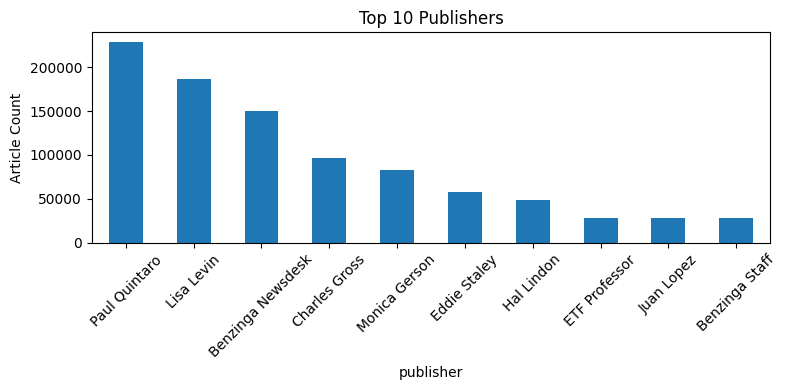

In [5]:
#Ploting a bar chart to make it more descriptive showing top 10 publishers
publisher_counts.head(10).plot(kind='bar', figsize=(8,4), title="Top 10 Publishers")
plt.ylabel("Article Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


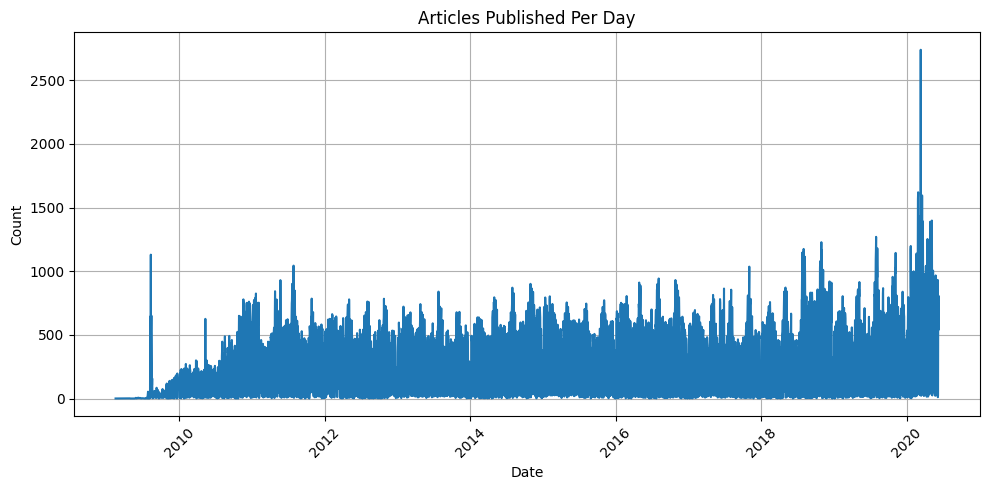

In [7]:
#Analyze Publication Dates

# Convert to datetime with UTC handling
df['date'] = pd.to_datetime(df['date'], utc=True, errors='coerce')


# Count articles per day
daily_counts = df['date'].dt.date.value_counts().sort_index()

# Plot the number of articles per day
daily_counts.plot(figsize=(10, 5), title="Articles Published Per Day")
plt.ylabel("Count")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
# Keyword Frequency Using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
# - max_features=20: Keep only the 20 most common words
# - stop_words='english': Ignore common English words
vectorizer = CountVectorizer(max_features=20, stop_words='english')

# Fit the vectorizer to the headline text and transform it into a word-frequency matrix
X = vectorizer.fit_transform(df['headline'].astype(str))

# Extract the top keywords based on frequency
keywords = vectorizer.get_feature_names_out()

# Display the top keywords
print(" Top 20 Keywords in Headlines:\n", keywords)



 Top 20 Keywords in Headlines:
 ['announces' 'benzinga' 'buy' 'downgrades' 'earnings' 'eps' 'est' 'market'
 'mid' 'price' 'pt' 'raises' 'reports' 'sales' 'shares' 'stocks' 'trading'
 'update' 'vs' 'week']


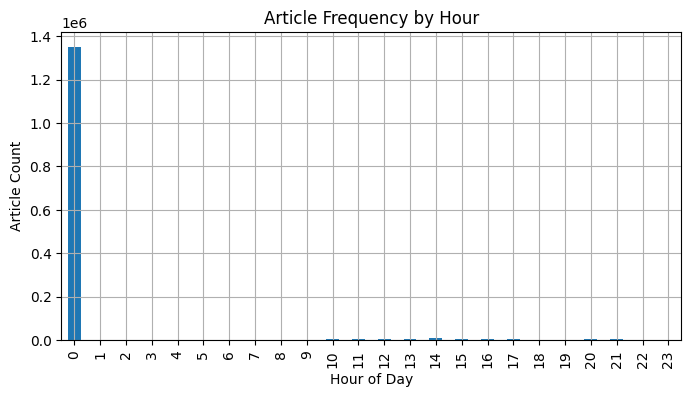

In [9]:
df['hour'] = df['date'].dt.hour

# Count articles per hour
hourly_counts = df['hour'].value_counts().sort_index()

hourly_counts.plot(kind='bar', title="Article Frequency by Hour", figsize=(8,4))
plt.xlabel("Hour of Day")
plt.ylabel("Article Count")
plt.grid(True)
plt.show()


In [14]:
# Extract the domain name from email addresses in the 'publisher' column
df['publisher_domain'] = df['publisher'].str.extract(r'@([\w\.-]+)')

# Count how many times each domain appears
domain_counts = df['publisher_domain'].value_counts()

# Display the top 10 most frequent domains
print(domain_counts.head(10))



publisher_domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64
